# Covid - 19 Data Analysis Project using Python

# Import the dataset using Pandas

In [2]:
import pandas as pd


In [5]:
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

# A)High Level Data Understanding:

## 1.Number of rows and columns

In [38]:
df.shape

(57394, 49)

## 2.Statistical summary

In [41]:
df.describe

<bound method NDFrame.describe of       iso_code continent       location      date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  31/12/19          NaN        0.0   
1          AFG      Asia    Afghanistan  01/01/20          NaN        0.0   
2          AFG      Asia    Afghanistan  02/01/20          NaN        0.0   
3          AFG      Asia    Afghanistan  03/01/20          NaN        0.0   
4          AFG      Asia    Afghanistan  04/01/20          NaN        0.0   
...        ...       ...            ...       ...          ...        ...   
57389      NaN       NaN  International  13/11/20        696.0        NaN   
57390      NaN       NaN  International  14/11/20        696.0        NaN   
57391      NaN       NaN  International  15/11/20        696.0        NaN   
57392      NaN       NaN  International  16/11/20        696.0        NaN   
57393      NaN       NaN  International  17/11/20        696.0        NaN   

       new_cases_smoothed  total_deaths  

## 3.Data types of each column

In [44]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

## 4.Dataset summary

In [57]:
df.info

<bound method DataFrame.info of       iso_code continent       location      date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  31/12/19          NaN        0.0   
1          AFG      Asia    Afghanistan  01/01/20          NaN        0.0   
2          AFG      Asia    Afghanistan  02/01/20          NaN        0.0   
3          AFG      Asia    Afghanistan  03/01/20          NaN        0.0   
4          AFG      Asia    Afghanistan  04/01/20          NaN        0.0   
...        ...       ...            ...       ...          ...        ...   
57389      NaN       NaN  International  13/11/20        696.0        NaN   
57390      NaN       NaN  International  14/11/20        696.0        NaN   
57391      NaN       NaN  International  15/11/20        696.0        NaN   
57392      NaN       NaN  International  16/11/20        696.0        NaN   
57393      NaN       NaN  International  17/11/20        696.0        NaN   

       new_cases_smoothed  total_deaths  ne

#  B) Low-Level Data Understanding

## 1.Count of unique values in the 'location' column

In [48]:
df['location'].nunique()

216

## 2.Continent with the maximum frequency

In [61]:
df['continent'].value_counts()

continent
Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: count, dtype: int64

## 3.Maximum and mean of 'total_cases'

In [65]:
df['total_cases'].max()

55154651.0

In [67]:
df['total_cases'].mean()

167797.3688753302

In [69]:
df['total_cases'].min()

1.0

## 4.Quartiles of 'total_deaths'

In [73]:
df['total_deaths'].describe().round(2)

count      44368.00
mean        6858.64
std        55780.81
min            1.00
25%           13.00
50%           84.00
75%          727.00
max      1328537.00
Name: total_deaths, dtype: float64

## 5.Continent with max human development index

In [77]:
df.groupby("continent").agg({"human_development_index":"max"}).head(1)

,human_development_index
continent,
Africa,0.797


## 6.Continent with min GDP per capita

In [80]:
df.groupby('continent').agg({'gdp_per_capita':'min'}).head(1)

,gdp_per_capita
continent,
Africa,661.24


# C) Filter and Update DataFrame

In [85]:
df=df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
df


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


# D) Data Cleaning

## 1.Remove duplicates

In [90]:
df.drop_duplicates()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


## 2.Check missing values

In [93]:
df.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

## 3.Remove rows where 'continent' is missing

In [96]:
df.dropna(subset=["continent"])

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


## 4.Fill remaining missing values with 0

In [99]:
df= df.fillna(0)

In [101]:
df.isnull().sum()

continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
dtype: int64

# E) Date-Time Format

## 1.Convert date column in datetime format using pandas.to_datetime

In [105]:
df['date']= pd.to_datetime(df['date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_10936\1211396873.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']= pd.to_datetime(df['date'])


In [107]:
df.dtypes

continent                          object
location                           object
date                       datetime64[ns]
total_cases                       float64
total_deaths                      float64
gdp_per_capita                    float64
human_development_index           float64
dtype: object

## 2.Create new column month after extracting month data from date column

In [110]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [112]:
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4
...,...,...,...,...,...,...,...,...
57389,0,International,2020-11-13,696.0,7.0,0.000,0.000,11
57390,0,International,2020-11-14,696.0,7.0,0.000,0.000,11
57391,0,International,2020-11-15,696.0,7.0,0.000,0.000,11
57392,0,International,2020-11-16,696.0,7.0,0.000,0.000,11


# F)Data Aggregation

# 1.Group by 'continent' and find the maximum values

In [117]:
df.groupby('continent').max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


## 2 Store the result in a new dataframe named 'df_groupby'.

In [120]:
df_groupby = df.groupby('continent').max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


# G) Feature Engineering

## 1.Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'




In [128]:
df_groupby["total_deaths_to_total_cases"]=df_groupby["total_deaths"]/df_groupby["total_cases"]

In [130]:
df_groupby["total_deaths_to_total_cases"]*100

0    2.408749
1    2.700364
2    1.470754
3    2.618830
4    2.206241
5    3.268468
6    2.825066
Name: total_deaths_to_total_cases, dtype: float64

In [132]:
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12,0.024087
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


# H) Data Visualization

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1.Histogram for GDP per capita

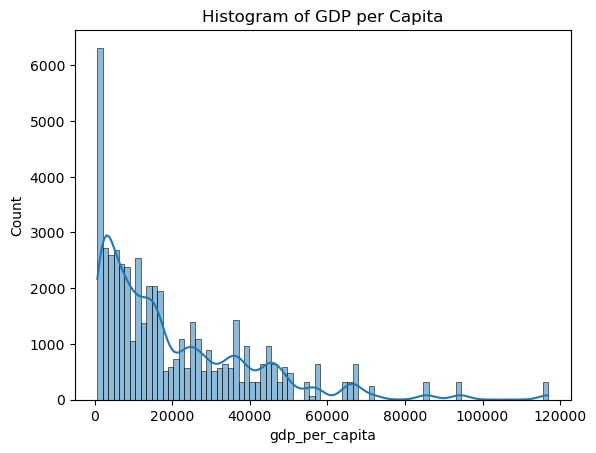

In [148]:
sns.histplot(data['gdp_per_capita'], kde=True)
plt.title("Histogram of GDP per Capita")
plt.show()

## 2.Scatter plot for total cases vs GDP per capita

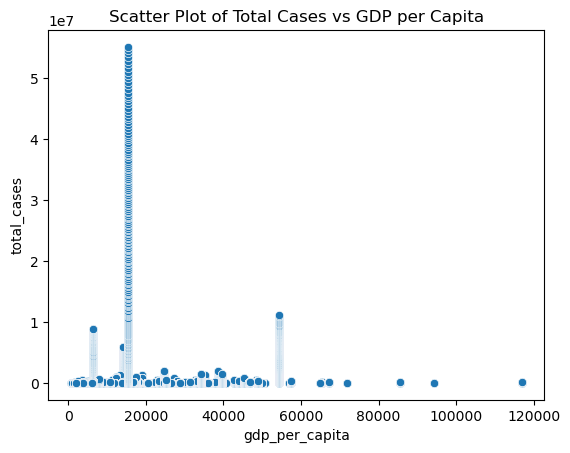

In [154]:
sns.scatterplot(x='gdp_per_capita', y='total_cases', data=data)
plt.title("Scatter Plot of Total Cases vs GDP per Capita")
plt.show()

## 3.Pairplot for grouped data

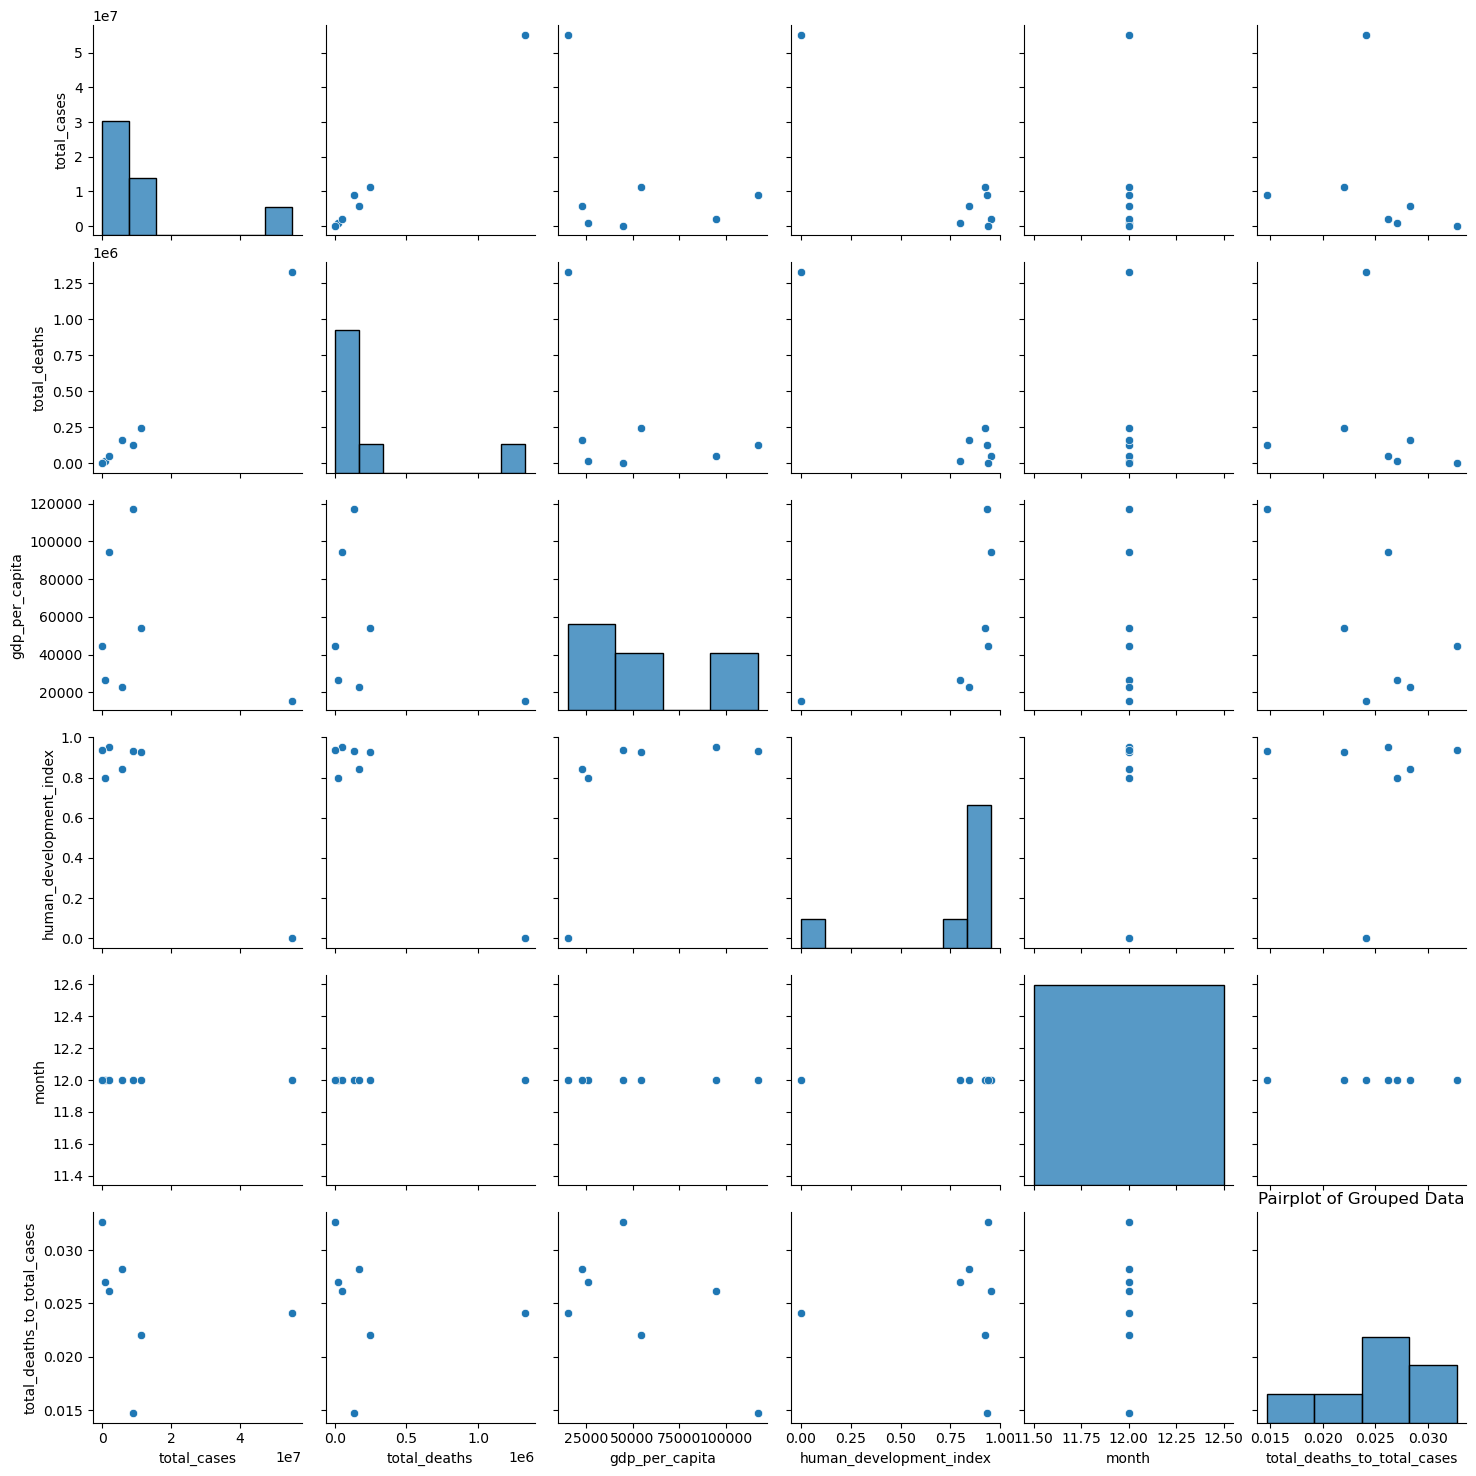

In [162]:
sns.pairplot(df_groupby)
plt.title("Pairplot of Grouped Data")
plt.show()

## 4.Bar plot for continent vs total cases


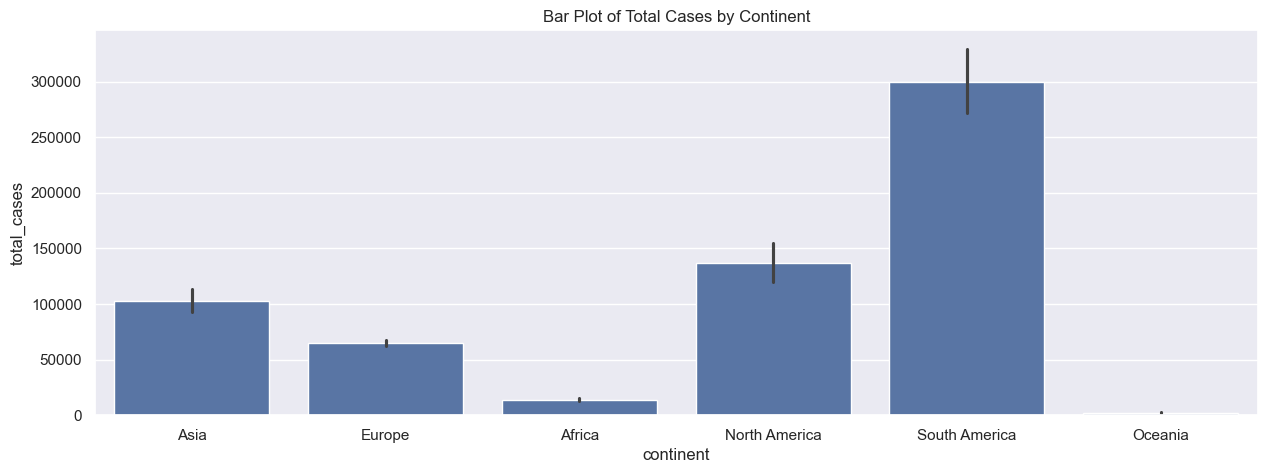

In [171]:
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(x='continent', y='total_cases', data=data)
plt.title("Bar Plot of Total Cases by Continent")
plt.show()

# I)Save the df_groupby dataframe in your local drive using pandas.to_csv function .

In [176]:
df.to_csv("covid_Data.csv")